In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/AKASH HN/Downloads/Internship/Customer_grouping/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


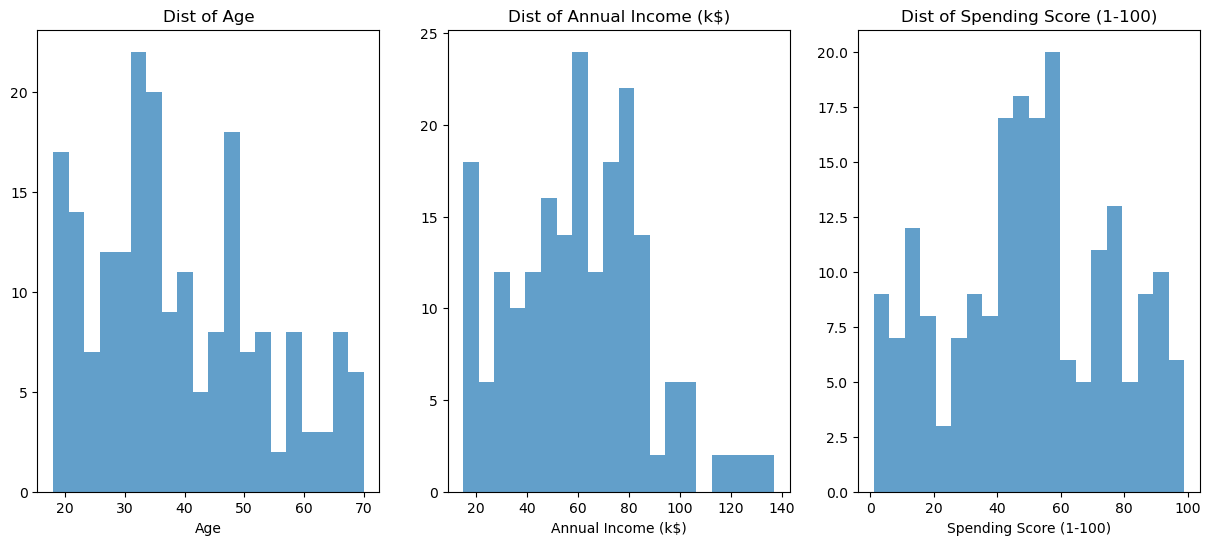

In [39]:
fig,ax = plt.subplots(1,3,figsize = (15,6))

for i,cols in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    ax[i].hist(data[cols],alpha = 0.7, bins = 20)
    ax[i].set_xlabel(cols)
    ax[i].set_title(f'Dist of {cols}')

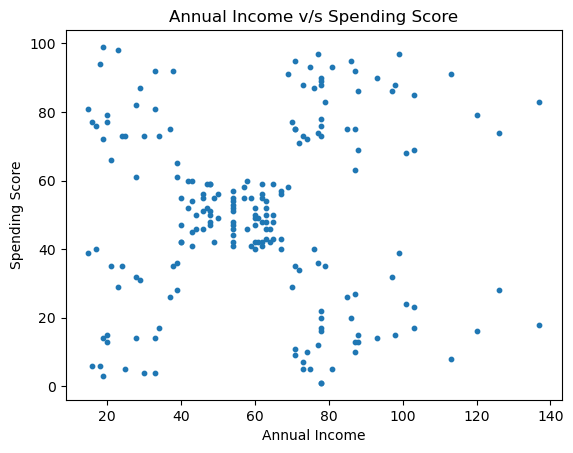

In [4]:
df = data.iloc[:,3:5].values
plt.scatter(df[:,0],df[:,1],s = 10)
plt.title('Annual Income v/s Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)
labels = kmeans.fit_predict(df)

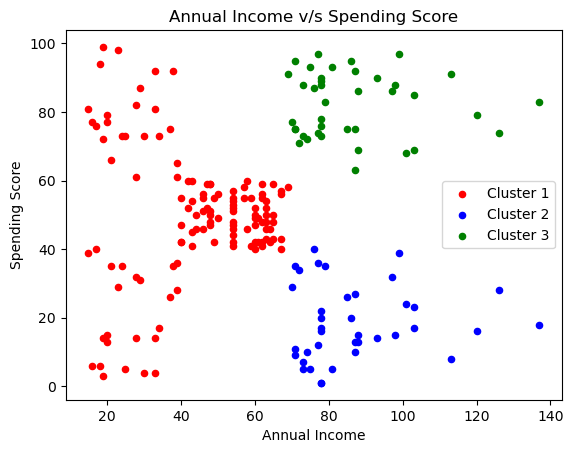

In [6]:
plt.scatter(df[labels == 0, 0],df[labels == 0, 1],c = 'red', label = 'Cluster 1', s = 20)
plt.scatter(df[labels == 1, 0],df[labels == 1, 1], c = 'b', label = 'Cluster 2', s = 20)
plt.scatter(df[labels == 2, 0],df[labels == 2, 1], c = 'green', label = 'Cluster 3', s = 20)
plt.title('Annual Income v/s Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

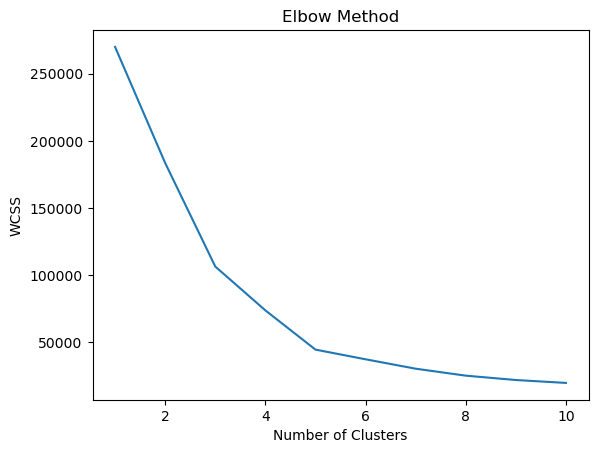

In [7]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = 'k-means++')
    model.fit(df)
    wcss.append(model.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_


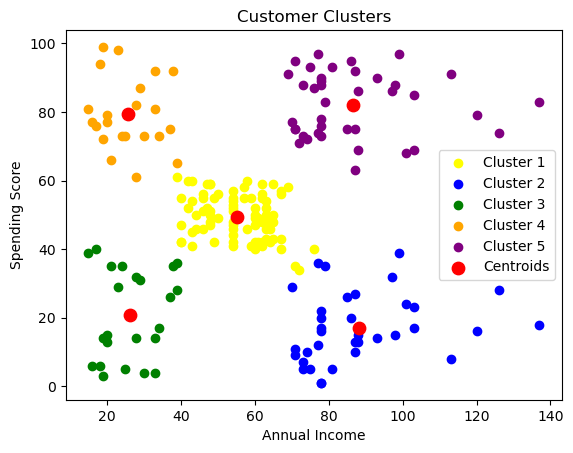

In [9]:
plt.scatter(df[labels == 0, 0],df[labels == 0, 1], label = 'Cluster 1', c = 'yellow')
plt.scatter(df[labels == 1, 0],df[labels == 1, 1], label = 'Cluster 2', c = 'blue')
plt.scatter(df[labels == 2, 0],df[labels == 2, 1], label = 'Cluster 3', c = 'green')
plt.scatter(df[labels == 3, 0],df[labels == 3, 1], label = 'Cluster 4',c = 'orange')
plt.scatter(df[labels == 4, 0],df[labels == 4, 1], label = 'Cluster 5',c = 'purple')
plt.scatter(centroids[:,0], centroids[:,1],c = 'red', label = 'Centroids',s = 80)
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()